In [19]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [20]:
# 1. 데이터 불러오기
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [21]:
# 2. 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
# 3. One-hot 인코딩
y_categorical = to_categorical(y, num_classes=10)

In [23]:
# 4. 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_categorical, test_size=0.3, random_state=42
)

In [24]:
# 5. DL 모델 정의 (MLP)
model = Sequential()
model.add(Dense(128, input_shape=(64,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))  # 숫자 0~9 → 10개 클래스

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
# 6) 모델 컴파일
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy', 'mse']
)


In [26]:
# 7. 학습
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32,
    verbose=1
)

Epoch 1/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.3266 - loss: 2.0428 - mse: 0.0824 - val_accuracy: 0.7907 - val_loss: 1.0507 - val_mse: 0.0457
Epoch 2/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8226 - loss: 0.7715 - mse: 0.0333 - val_accuracy: 0.9278 - val_loss: 0.3119 - val_mse: 0.0132
Epoch 3/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9404 - loss: 0.2503 - mse: 0.0109 - val_accuracy: 0.9426 - val_loss: 0.1880 - val_mse: 0.0082
Epoch 4/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9779 - loss: 0.1169 - mse: 0.0047 - val_accuracy: 0.9537 - val_loss: 0.1515 - val_mse: 0.0070
Epoch 5/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9870 - loss: 0.0820 - mse: 0.0031 - val_accuracy: 0.9704 - val_loss: 0.1075 - val_mse: 0.0046
Epoch 6/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9945 - loss: 0.0462 - mse: 0.0015 - val_accuracy: 0.9833 - val_loss: 0.0905 - val_mse: 0.0036
Epoch 7/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step -

In [27]:
# 8) 평가
loss, acc, mse = model.evaluate(X_test, y_test, verbose=0)
print(f"DL 모델 테스트 정확도: {acc:.4f}")
print(f"DL 모델 테스트 MSE : {mse:.6f}")

DL 모델 테스트 정확도: 0.9833
DL 모델 테스트 MSE : 0.002954


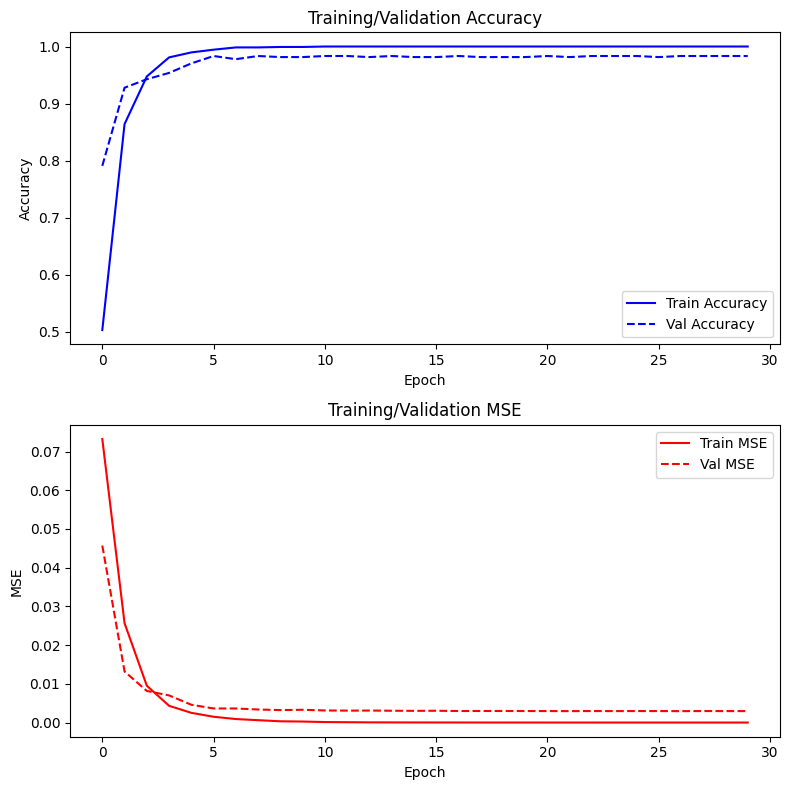

In [28]:
# 9) 학습 곡선 시각화
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,8))

# 정확도 그래프
ax1.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
ax1.plot(history.history['val_accuracy'], label='Val Accuracy', color='blue', linestyle='--')
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Accuracy")
ax1.legend()
ax1.set_title("Training/Validation Accuracy")

# MSE 그래프
ax2.plot(history.history['mse'], label='Train MSE', color='red')
ax2.plot(history.history['val_mse'], label='Val MSE', color='red', linestyle='--')
ax2.set_xlabel("Epoch")
ax2.set_ylabel("MSE")
ax2.legend()
ax2.set_title("Training/Validation MSE")

plt.tight_layout()
plt.show()